In [512]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date
import seaborn as sns

In [513]:
df=pd.read_csv('train-chennai-sale.csv')
#Reading csv file from directory
df.shape

(7109, 22)

In [514]:
#Creating House age column by using house sold date and house build date,
#Dropping DATE_SALE and DATE_BUILD columns as there are no feature outcome of these 2 columns
#Dropping PRT_ID	from dateset as it will not contribute in model building
df['House_Age']=pd.to_datetime(df['DATE_SALE']).apply(lambda x: x.year) - pd.to_datetime(df['DATE_BUILD']).apply(lambda x: x.year)
df = df.drop(columns=['DATE_SALE', 'DATE_BUILD'])
df = df.drop(columns=['PRT_ID'])
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,House_Age
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,44
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,11
2,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,20
3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,22
4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,30


In [515]:
#Dropping duplicates from data set
df=df.drop_duplicates()

In [516]:
df.info()
#There are 7109 rows/21 columns(after deleting date_build & date_sale columns, added House_Age columns)
#PRT_ID dont derive any value to build model, we can delete
#there are no duplicates in dataset there are null values to be replaced or removed
#N_BATHROOM has 5 null values
#QS_OVERALL has 48 null values
#Cant predict null values columns, we can remove null records or replace with mean/mode values or we can imutate to replace values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7109 entries, 0 to 7108
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   object 
 1   INT_SQFT       7109 non-null   int64  
 2   DIST_MAINROAD  7109 non-null   int64  
 3   N_BEDROOM      7108 non-null   float64
 4   N_BATHROOM     7104 non-null   float64
 5   N_ROOM         7109 non-null   int64  
 6   SALE_COND      7109 non-null   object 
 7   PARK_FACIL     7109 non-null   object 
 8   BUILDTYPE      7109 non-null   object 
 9   UTILITY_AVAIL  7109 non-null   object 
 10  STREET         7109 non-null   object 
 11  MZZONE         7109 non-null   object 
 12  QS_ROOMS       7109 non-null   float64
 13  QS_BATHROOM    7109 non-null   float64
 14  QS_BEDROOM     7109 non-null   float64
 15  QS_OVERALL     7061 non-null   float64
 16  REG_FEE        7109 non-null   int64  
 17  COMMIS         7109 non-null   int64  
 18  SALES_PR

In [517]:
df.dtypes
#df.shape
#df.isnull().sum()

AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
House_Age          int64
dtype: object

# Spelling_Mistake check and correction to common values

In [518]:
df['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [519]:
df['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [520]:
df['PARK_FACIL'].unique()


array(['Yes', 'No', 'Noo'], dtype=object)

In [521]:
df['BUILDTYPE'].unique()
         

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [522]:

df['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [523]:
df['STREET'].unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [524]:
df['MZZONE'].unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [525]:
df = df.replace({'AREA':{'Karapakam':'Karapakkam', 
                         'Ana Nagar':'Anna Nagar',
                         'Ann Nagar':'Anna Nagar',
                         'Adyr':'Adyar',
                         'Velchery':'Velachery',
                         'Chrompt':'Chrompet',
                         'Chormpet':'Chrompet',
                         'Chrmpet':'Chrompet',
                         'KKNagar':'KK Nagar',
                         'TNagar':'T Nagar'
                         },
                 'SALE_COND':{'Ab  Normaal':'AbNormal','Ab Normal':'AbNormal','PartiaLl':'Partial','Partiall':'Partial','Adj Land':'AdjLand'},
                 'PARK_FACIL':{'Noo':'No'},
                 'BUILDTYPE':{'Comercial':'Commercial','Other':'Others'},
                 'UTILITY_AVAIL':{'All Pub':'AllPub','NoSewr ':'NoSewr'},
                 'STREET':{'Pavd':'Paved','NoAccess':'No Access'}
                         })


In [526]:
df['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [527]:
df['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

In [528]:
df['PARK_FACIL'].unique()

array(['Yes', 'No'], dtype=object)

In [529]:
df['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'House'], dtype=object)

In [530]:
df['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr', 'NoSeWa'], dtype=object)

In [531]:
df['STREET'].unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

In [532]:
df['MZZONE'].unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [533]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7109 entries, 0 to 7108
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   object 
 1   INT_SQFT       7109 non-null   int64  
 2   DIST_MAINROAD  7109 non-null   int64  
 3   N_BEDROOM      7108 non-null   float64
 4   N_BATHROOM     7104 non-null   float64
 5   N_ROOM         7109 non-null   int64  
 6   SALE_COND      7109 non-null   object 
 7   PARK_FACIL     7109 non-null   object 
 8   BUILDTYPE      7109 non-null   object 
 9   UTILITY_AVAIL  7109 non-null   object 
 10  STREET         7109 non-null   object 
 11  MZZONE         7109 non-null   object 
 12  QS_ROOMS       7109 non-null   float64
 13  QS_BATHROOM    7109 non-null   float64
 14  QS_BEDROOM     7109 non-null   float64
 15  QS_OVERALL     7061 non-null   float64
 16  REG_FEE        7109 non-null   int64  
 17  COMMIS         7109 non-null   int64  
 18  SALES_PR

In [534]:
df.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'REG_FEE', 'COMMIS', 'SALES_PRICE', 'House_Age'],
      dtype='object')

In [535]:
df=df.reindex(columns=['AREA','INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM','N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL','STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM','QS_OVERALL','House_Age','REG_FEE', 'COMMIS','SALES_PRICE'])
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,House_Age,REG_FEE,COMMIS,SALES_PRICE
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,44,380000,144400,7600000
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,11,760122,304049,21717770
2,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,20,421094,92114,13159200
3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,22,356321,77042,9630290
4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,30,237000,74063,7406250


Null Values imputations using k-NN

In [536]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7109 entries, 0 to 7108
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   object 
 1   INT_SQFT       7109 non-null   int64  
 2   DIST_MAINROAD  7109 non-null   int64  
 3   N_BEDROOM      7108 non-null   float64
 4   N_BATHROOM     7104 non-null   float64
 5   N_ROOM         7109 non-null   int64  
 6   SALE_COND      7109 non-null   object 
 7   PARK_FACIL     7109 non-null   object 
 8   BUILDTYPE      7109 non-null   object 
 9   UTILITY_AVAIL  7109 non-null   object 
 10  STREET         7109 non-null   object 
 11  MZZONE         7109 non-null   object 
 12  QS_ROOMS       7109 non-null   float64
 13  QS_BATHROOM    7109 non-null   float64
 14  QS_BEDROOM     7109 non-null   float64
 15  QS_OVERALL     7061 non-null   float64
 16  House_Age      7109 non-null   int64  
 17  REG_FEE        7109 non-null   int64  
 18  COMMIS  

In [537]:
!pip install impyute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [538]:
#Replacing null values with nearest best values which fit them according to available dataset
import sys
from impyute.imputation.cs import fast_knn
sys.setrecursionlimit(100000) #Increase the recursion limit of the OS
print('Number of null values in columns:',np.isnan(df[['N_BATHROOM']].values).sum())
# start the KNN training
imputed_training=fast_knn(df[['N_BATHROOM']].values, k=30)
print('Number of null values after k-NN imputation:',np.isnan(imputed_training).sum())
df_BATHROOM = pd.DataFrame(imputed_training, columns = ['N_BATHROOM'])
#df_BATHROOM
df['N_BATHROOM']=df_BATHROOM



Number of null values in columns: 5
Number of null values after k-NN imputation: 0


In [539]:
print('Number of null values in columns:',np.isnan(df[['N_BEDROOM']].values).sum())
# start the KNN training
imputed_training=fast_knn(df[['N_BEDROOM']].values, k=30)
print('Number of null values after k-NN imputation:',np.isnan(imputed_training).sum())
df_BATHROOM = pd.DataFrame(imputed_training, columns = ['N_BEDROOM'])
#df_BATHROOM
df['N_BEDROOM']=df_BATHROOM

Number of null values in columns: 1
Number of null values after k-NN imputation: 0


In [540]:
print('Number of null values in columns:',np.isnan(df[['QS_OVERALL']].values).sum())
# start the KNN training
imputed_training=fast_knn(df[['QS_OVERALL']].values, k=30)
print('Number of null values after k-NN imputation:',np.isnan(imputed_training).sum())
df_BATHROOM = pd.DataFrame(imputed_training, columns = ['QS_OVERALL'])
#df_BATHROOM
df['QS_OVERALL']=df_BATHROOM

Number of null values in columns: 48
Number of null values after k-NN imputation: 0


In [541]:
df.info()
#All null values replaced with appropriate values using k-NN imputation

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7109 entries, 0 to 7108
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   object 
 1   INT_SQFT       7109 non-null   int64  
 2   DIST_MAINROAD  7109 non-null   int64  
 3   N_BEDROOM      7109 non-null   float64
 4   N_BATHROOM     7109 non-null   float64
 5   N_ROOM         7109 non-null   int64  
 6   SALE_COND      7109 non-null   object 
 7   PARK_FACIL     7109 non-null   object 
 8   BUILDTYPE      7109 non-null   object 
 9   UTILITY_AVAIL  7109 non-null   object 
 10  STREET         7109 non-null   object 
 11  MZZONE         7109 non-null   object 
 12  QS_ROOMS       7109 non-null   float64
 13  QS_BATHROOM    7109 non-null   float64
 14  QS_BEDROOM     7109 non-null   float64
 15  QS_OVERALL     7109 non-null   float64
 16  House_Age      7109 non-null   int64  
 17  REG_FEE        7109 non-null   int64  
 18  COMMIS  

# Features Distribution

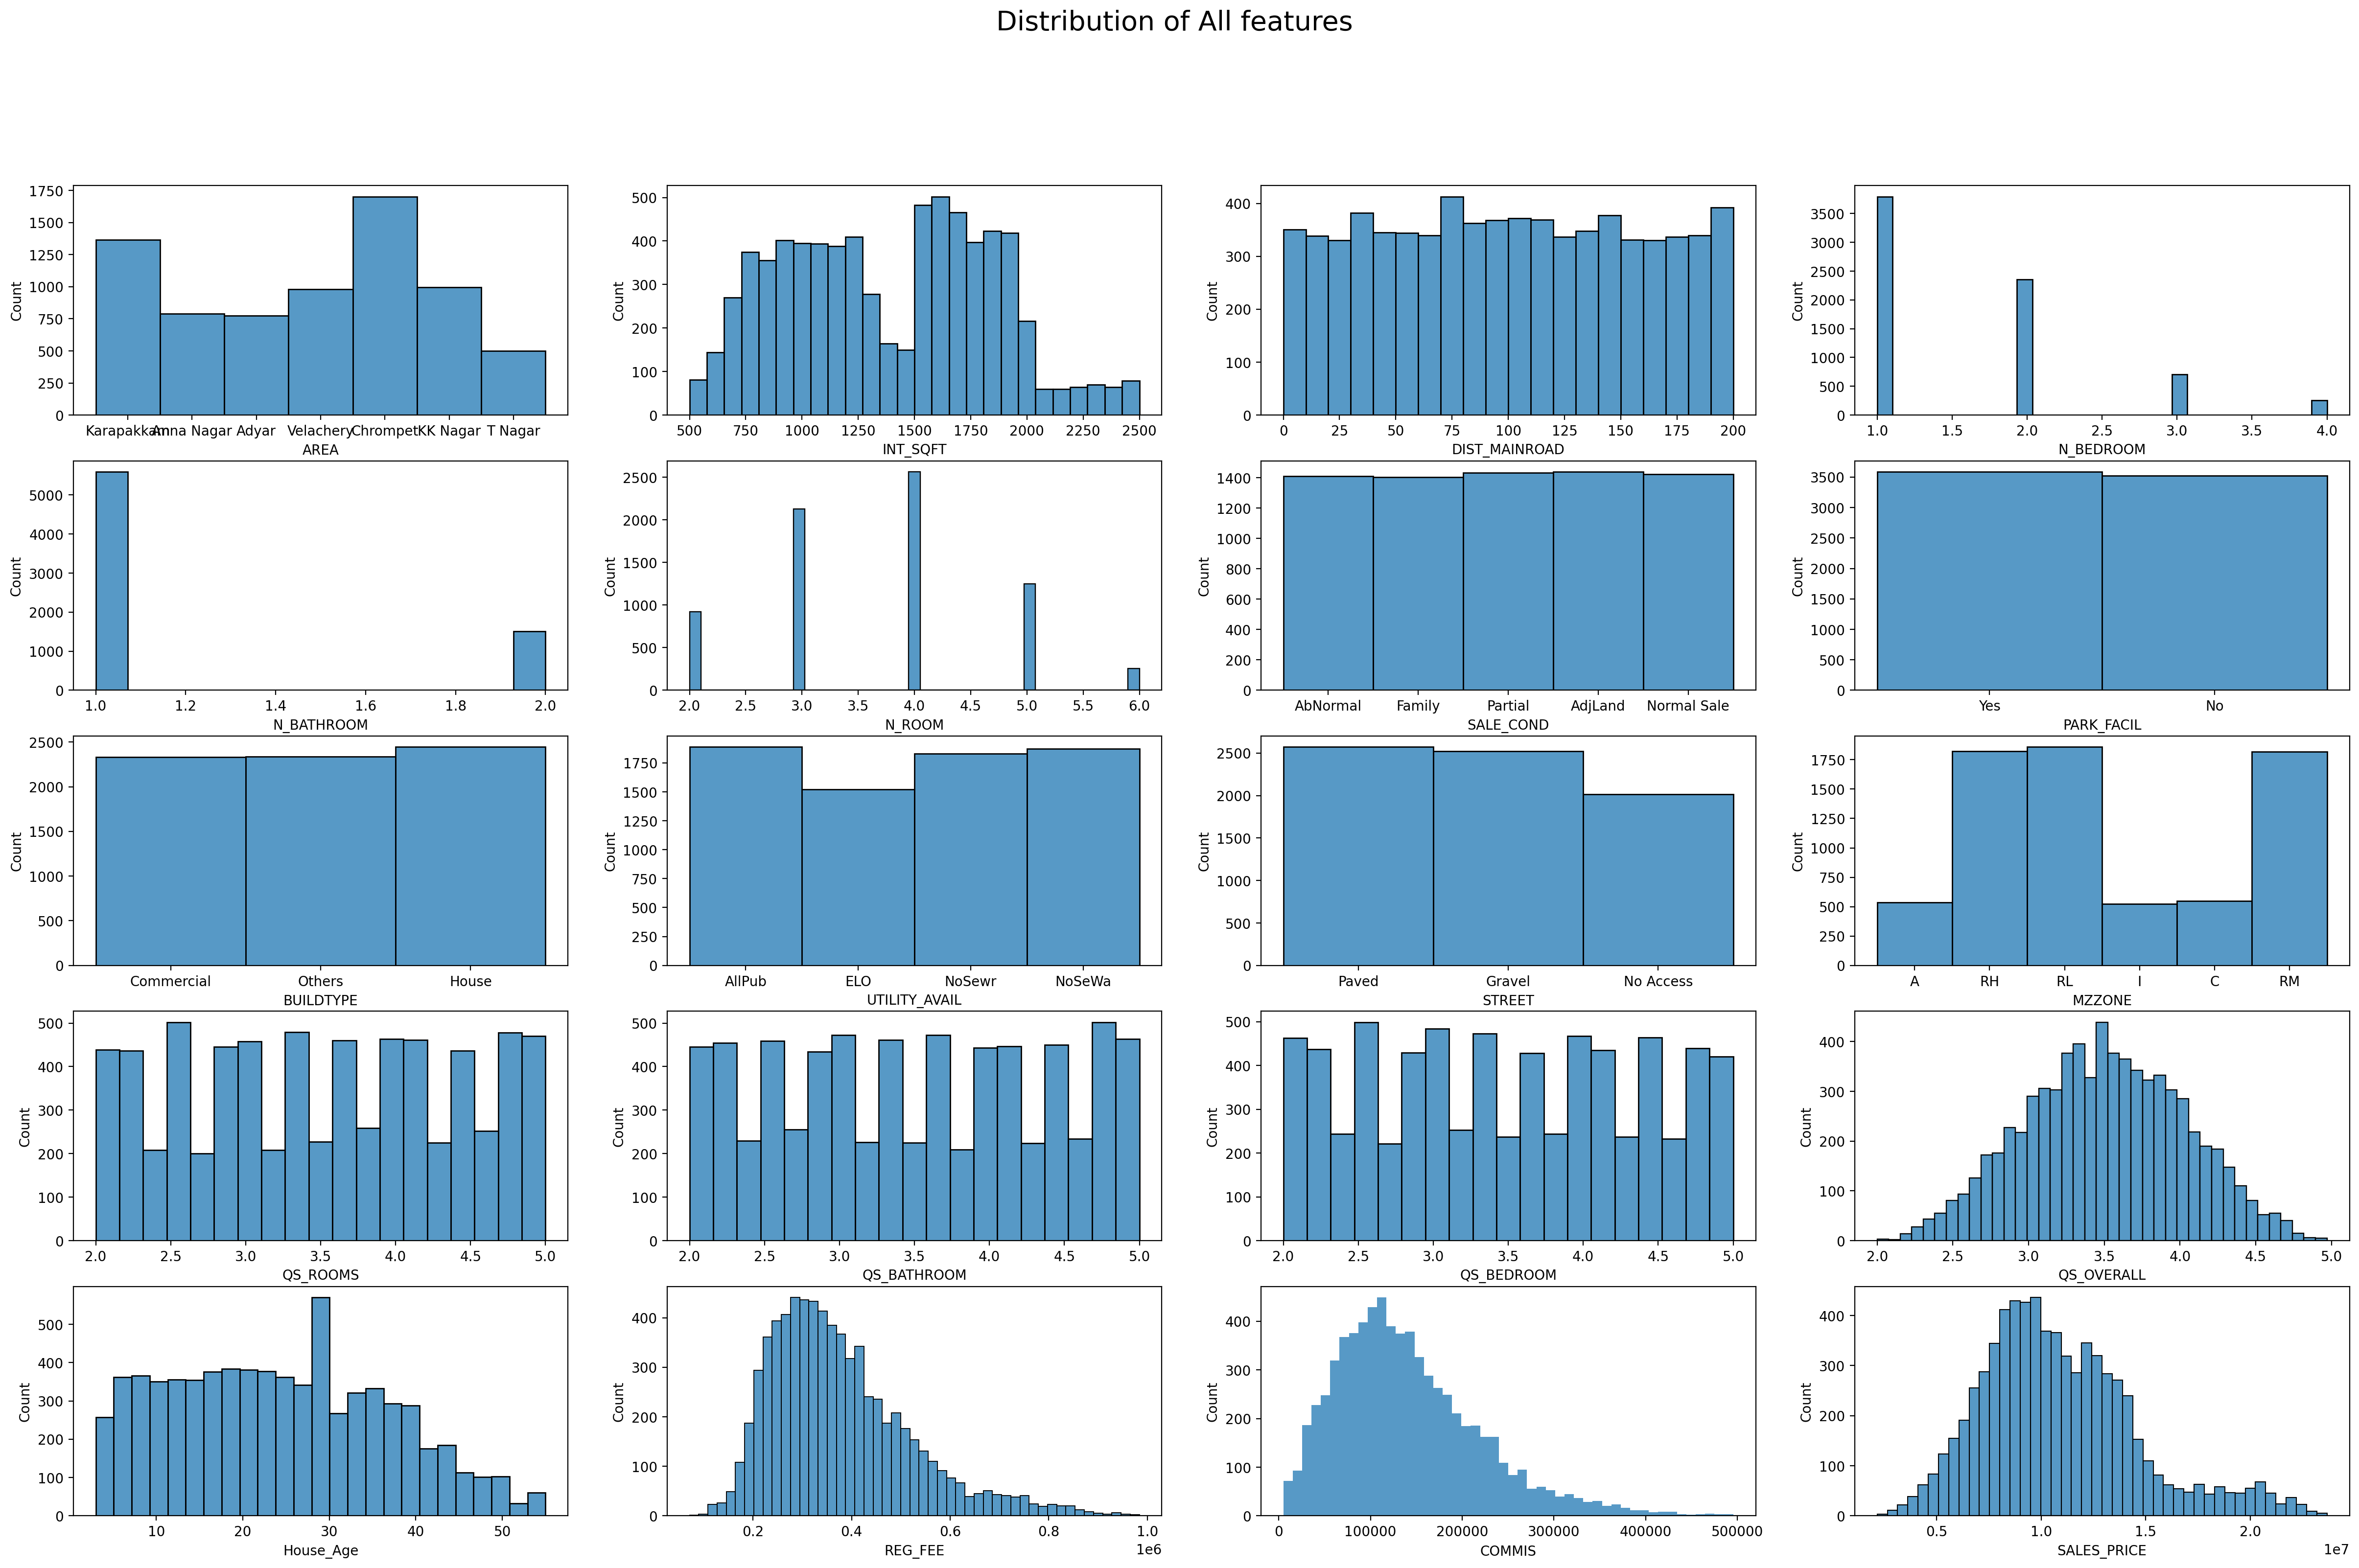

In [542]:
#Distribution of dataset
plt.figure(figsize=(30, 18), dpi=200)

plt.subplot(5,4,1)
sns.histplot(df['AREA'])

plt.subplot(5,4,2)
sns.histplot(df['INT_SQFT'])

plt.subplot(5,4,3)
sns.histplot(df['DIST_MAINROAD'])

plt.subplot(5,4,4)
sns.histplot(df['N_BEDROOM'])

plt.subplot(5,4,5)
sns.histplot(df['N_BATHROOM'])

plt.subplot(5,4,6)
sns.histplot(df['N_ROOM'])

plt.subplot(5,4,7)
sns.histplot(df['SALE_COND'])

plt.subplot(5,4,8)
sns.histplot(df['PARK_FACIL'])

plt.subplot(5,4,9)
sns.histplot(df['BUILDTYPE'])

plt.subplot(5,4,10)
sns.histplot(df['UTILITY_AVAIL'])

plt.subplot(5,4,11)
sns.histplot(df['STREET'])

plt.subplot(5,4,12)
sns.histplot(df['MZZONE'])

plt.subplot(5,4,13)
sns.histplot(df['QS_ROOMS'])

plt.subplot(5,4,14)
sns.histplot(df['QS_BATHROOM'])

plt.subplot(5,4,15)
sns.histplot(df['QS_BEDROOM'])

plt.subplot(5,4,16)
sns.histplot(df['QS_OVERALL'])

plt.subplot(5,4,17)
sns.histplot(df['House_Age'])

plt.subplot(5,4,18)
sns.histplot(df['REG_FEE'])

plt.subplot(5,4,19)
sns.histplot(df['COMMIS'], linewidth=0)

plt.subplot(5,4,20)
sns.histplot(df[ 'SALES_PRICE'])

plt.suptitle("Distribution of All features", fontsize=20)
plt.show()

# Dependencies of features with respect to Target feature 

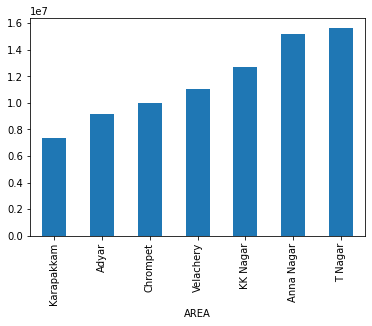

In [543]:
df.groupby('AREA')['SALES_PRICE'].mean().sort_values(ascending=True).plot.bar()

In [544]:
#there is order in data, AREA column with respect to SALES_PRICE, Hence We need to follow label encoding for AREA column

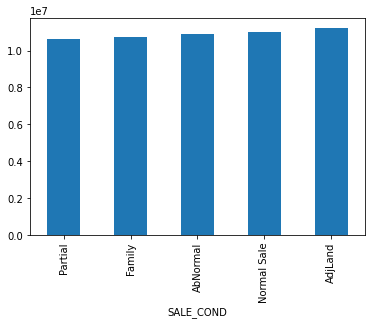

In [545]:
df.groupby('SALE_COND')['SALES_PRICE'].mean().sort_values(ascending=True).plot.bar()

In [546]:
#We can see there is minimal order in data SALE_COND with respect to SALE_PRICE, We need to do label encoding for the data

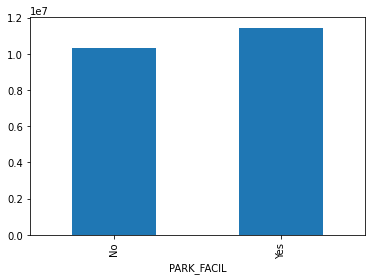

In [547]:
df.groupby('PARK_FACIL')['SALES_PRICE'].mean().sort_values(ascending=True).plot.bar()

In [548]:
#We can see there is order in data PARK_FACIL with respect to SALE_PRICE, We need to do label encoding for the data

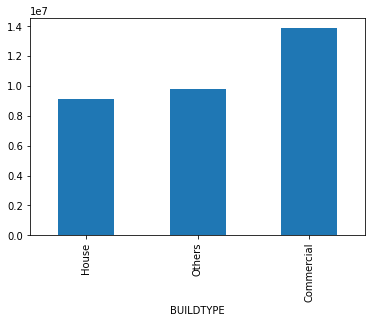

In [549]:
df.groupby('BUILDTYPE')['SALES_PRICE'].mean().sort_values(ascending=True).plot.bar()

In [550]:
#We can see there is no order in data BUILD_TYPE with respect to SALE_PRICE, We need to do One-Hot encoding for the data

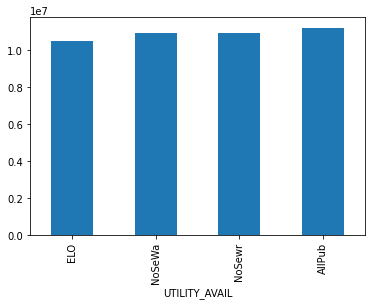

In [551]:
df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().sort_values(ascending=True).plot.bar()

In [552]:
#We can see there is order in data UTILITY_AVAIL with respect to SALE_PRICE, We need to do label encoding for the data

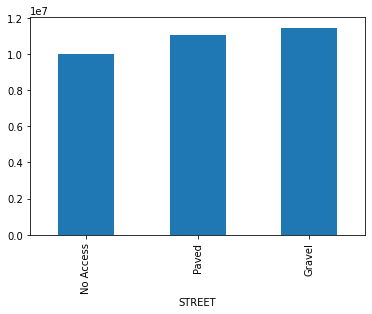

In [553]:
df.groupby('STREET')['SALES_PRICE'].mean().sort_values(ascending=True).plot.bar()

In [554]:
#We can see there is order in data STREET with respect to SALE_PRICE, We need to do label encoding for the data

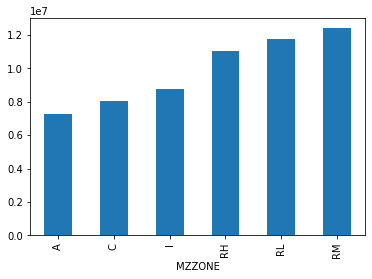

In [555]:
df.groupby('MZZONE')['SALES_PRICE'].mean().sort_values(ascending=True).plot.bar()

In [556]:
 #We can see there is order in data MZZONE with respect to SALE_PRICE, We need to do label encoding for the data

In [557]:
#df.groupby('QS_ROOMS')['SALES_PRICE'].mean().sort_values(ascending=True).plot.bar()

In [558]:
#df.groupby('QS_BATHROOM')['SALES_PRICE'].mean().sort_values(ascending=True).plot.bar()

In [559]:
#df.groupby('QS_BEDROOM')['SALES_PRICE'].mean().sort_values(ascending=True).plot.bar()


In [560]:
#df.groupby('QS_OVERALL')['SALES_PRICE'].mean().sort_values(ascending=True).plot.bar()


In [561]:
#df.groupby('House_Age')['SALES_PRICE'].mean().sort_values(ascending=True).plot.bar()

In [562]:
#df.groupby('REG_FEE')['SALES_PRICE'].mean().sort_values(ascending=True).plot.bar()

In [563]:
#df.groupby('COMMIS')['SALES_PRICE'].mean().sort_values(ascending=True).plot.bar()

In [564]:
df.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'House_Age', 'REG_FEE', 'COMMIS', 'SALES_PRICE'],
      dtype='object')

In [565]:
df['N_BEDROOM'] = df['N_BEDROOM'].astype('int')
df['N_BATHROOM'] = df['N_BATHROOM'].astype('int')
df.dtypes

AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM          int64
N_BATHROOM         int64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
House_Age          int64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [626]:
dfT=df

In [627]:
#One-Hot Encoding for BUILDTYPE  data
dfT=pd.get_dummies(dfT,columns=['BUILDTYPE'])


In [628]:
dfT['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [629]:
#Label Encoding for AREA data having order with SALE_PICE
dfT['AREA'] = dfT['AREA'].map({'Karapakkam' : 0, 'Adyar' : 1,'Chrompet':2,'Velachery':3,'KK Nagar':4,'Anna Nagar':5,'T Nagar':6})

In [630]:
dfT['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

In [631]:
#Label Encoding for SALE_COND data having order with SALE_PICE
dfT['SALE_COND'] = dfT['SALE_COND'].map({'Partial' : 0, 'Family' : 1,'AbNormal':2,'Normal Sale':3,'AdjLand':4})

In [632]:
dfT['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr', 'NoSeWa'], dtype=object)

In [633]:
#Label Encoding for UTILITY_AVAIL data having order with SALE_PICE
dfT['UTILITY_AVAIL'] = dfT['UTILITY_AVAIL'].map({'ELO' : 0, 'NoSeWa' : 1,'NoSewr':2,'AllPub':3})

In [634]:
dfT['STREET'].unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

In [635]:
#Label Encoding for STREET data having order with SALE_PICE
dfT['STREET'] = dfT['STREET'].map({'No Access' : 0, 'Paved' : 1,'Gravel':2})

In [636]:
dfT['MZZONE'].unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [637]:
#Label Encoding for MZZONE data having order with SALE_PICE
dfT['MZZONE'] = dfT['MZZONE'].map({'A' : 0, 'C' : 1,'I':2,'RH':3,'RL':4,'RM':5})

In [638]:
dfT['PARK_FACIL'].unique()

array(['Yes', 'No'], dtype=object)

In [639]:
#Label Encoding for PARK_FACIL data having order with SALE_PICE
dfT['PARK_FACIL'] = dfT['PARK_FACIL'].map({'No' : 0, 'Yes' : 1})

In [640]:
dfT.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,...,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,House_Age,REG_FEE,COMMIS,SALES_PRICE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,0,1004,131,1,1,3,2,1,3,1,...,3.9,4.9,4.330,44,380000,144400,7600000,1,0,0
1,5,1986,26,2,1,5,2,0,3,2,...,4.2,2.5,3.765,11,760122,304049,21717770,1,0,0
2,1,909,70,1,1,3,2,1,0,2,...,3.8,2.2,3.090,20,421094,92114,13159200,1,0,0
3,3,1855,14,3,2,5,1,0,2,1,...,3.9,3.6,4.010,22,356321,77042,9630290,0,0,1
4,0,1226,84,1,1,3,2,1,3,2,...,2.5,4.1,3.290,30,237000,74063,7406250,0,0,1


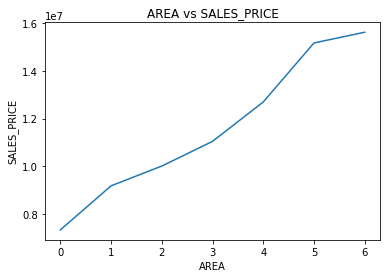

In [641]:
dfT.groupby('AREA')['SALES_PRICE'].mean().plot()
plt.title('AREA vs SALES_PRICE')
plt.xlabel('AREA')
plt.ylabel('SALES_PRICE')
plt.show()

In [642]:
#AREA vs SALES_PRICE have linear relation between them

In [643]:
dfT[['AREA','SALES_PRICE']].corr()
#AREA has good correlation SALES_PRICE of .69

,AREA,SALES_PRICE
AREA,1.000000,0.694149
SALES_PRICE,0.694149,1.000000


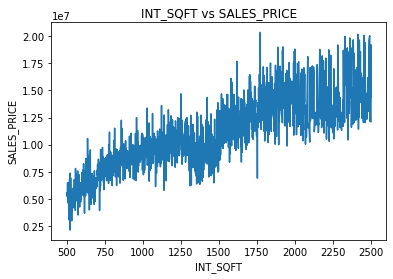

In [644]:
dfT.groupby('INT_SQFT')['SALES_PRICE'].mean().plot()
plt.xlabel('INT_SQFT')
plt.ylabel('SALES_PRICE')
plt.title('INT_SQFT vs SALES_PRICE')
plt.show()


In [645]:
#INT_SQFT has linear relationshipt with SALES_PRICE and good correlation value
dfT[['INT_SQFT','SALES_PRICE']].corr()

,INT_SQFT,SALES_PRICE
INT_SQFT,1.000000,0.612125
SALES_PRICE,0.612125,1.000000


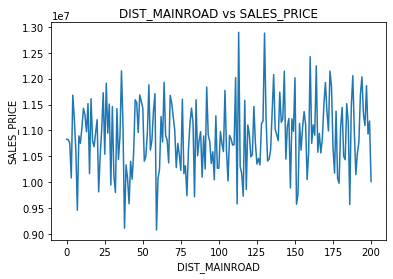

In [646]:
dfT.groupby('DIST_MAINROAD')['SALES_PRICE'].mean().plot()
plt.xlabel('DIST_MAINROAD')
plt.ylabel('SALES_PRICE')
plt.title('DIST_MAINROAD vs SALES_PRICE')
plt.show()

In [647]:
dfT[['DIST_MAINROAD','SALES_PRICE']].corr()

,DIST_MAINROAD,SALES_PRICE
DIST_MAINROAD,1.000000,0.018783
SALES_PRICE,0.018783,1.000000


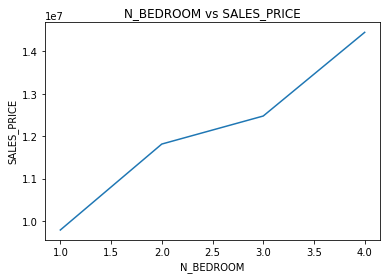

In [648]:
dfT.groupby('N_BEDROOM')['SALES_PRICE'].mean().plot()
plt.xlabel('N_BEDROOM')
plt.ylabel('SALES_PRICE')
plt.title('N_BEDROOM vs SALES_PRICE')
plt.show()

In [649]:
dfT[['N_BEDROOM','SALES_PRICE']].corr()

,N_BEDROOM,SALES_PRICE
N_BEDROOM,1.000000,0.330992
SALES_PRICE,0.330992,1.000000


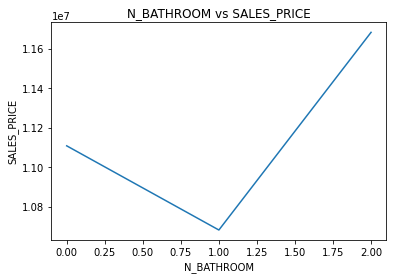

In [650]:
dfT.groupby('N_BATHROOM')['SALES_PRICE'].mean().plot()
plt.xlabel('N_BATHROOM')
plt.ylabel('SALES_PRICE')
plt.title('N_BATHROOM vs SALES_PRICE')
plt.show()

In [651]:
dfT[['N_BATHROOM','SALES_PRICE']].corr()

,N_BATHROOM,SALES_PRICE
N_BATHROOM,1.000000,0.108414
SALES_PRICE,0.108414,1.000000


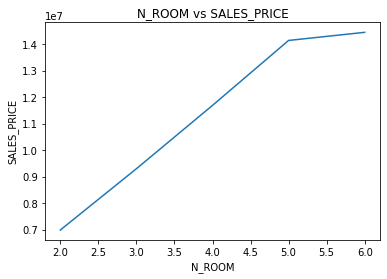

In [652]:
dfT.groupby('N_ROOM')['SALES_PRICE'].mean().plot()
plt.xlabel('N_ROOM')
plt.ylabel('SALES_PRICE')
plt.title('N_ROOM vs SALES_PRICE')
plt.show()

In [653]:
dfT[['N_ROOM','SALES_PRICE']].corr()

,N_ROOM,SALES_PRICE
N_ROOM,1.00000,0.60276
SALES_PRICE,0.60276,1.00000


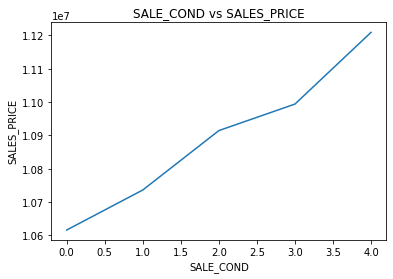

In [654]:
dfT.groupby('SALE_COND')['SALES_PRICE'].mean().plot()
plt.xlabel('SALE_COND')
plt.ylabel('SALES_PRICE')
plt.title('SALE_COND vs SALES_PRICE')
plt.show()

In [655]:
dfT[['SALE_COND','SALES_PRICE']].corr()

,SALE_COND,SALES_PRICE
SALE_COND,1.00000,0.05437
SALES_PRICE,0.05437,1.00000


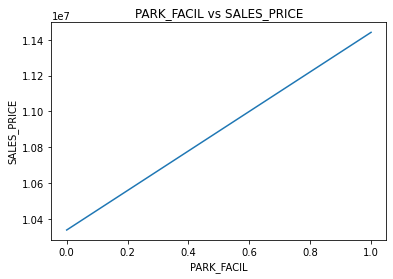

In [656]:
dfT.groupby('PARK_FACIL')['SALES_PRICE'].mean().plot()
plt.xlabel('PARK_FACIL')
plt.ylabel('SALES_PRICE')
plt.title('PARK_FACIL vs SALES_PRICE')
plt.show()

In [657]:
dfT[['PARK_FACIL','SALES_PRICE']].corr()

,PARK_FACIL,SALES_PRICE
PARK_FACIL,1.000000,0.146428
SALES_PRICE,0.146428,1.000000


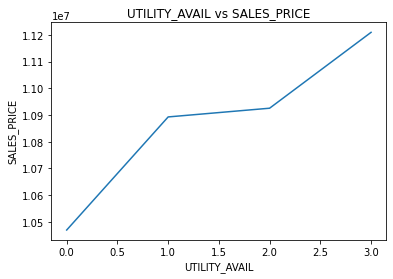

In [658]:
dfT.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().plot()
plt.xlabel('UTILITY_AVAIL')
plt.ylabel('SALES_PRICE')
plt.title('UTILITY_AVAIL vs SALES_PRICE')
plt.show()

In [659]:
dfT[['UTILITY_AVAIL','SALES_PRICE']].corr()

,UTILITY_AVAIL,SALES_PRICE
UTILITY_AVAIL,1.000000,0.064418
SALES_PRICE,0.064418,1.000000


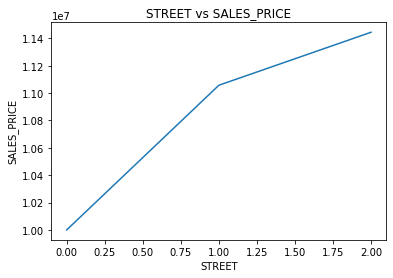

In [660]:
dfT.groupby('STREET')['SALES_PRICE'].mean().plot()
plt.xlabel('STREET')
plt.ylabel('SALES_PRICE')
plt.title('STREET vs SALES_PRICE')
plt.show()

In [661]:
dfT[['STREET','SALES_PRICE']].corr()

,STREET,SALES_PRICE
STREET,1.000000,0.149589
SALES_PRICE,0.149589,1.000000


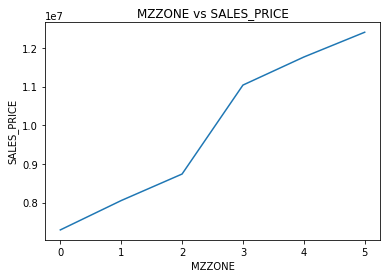

In [662]:
dfT.groupby('MZZONE')['SALES_PRICE'].mean().plot()
plt.xlabel('MZZONE')
plt.ylabel('SALES_PRICE')
plt.title('MZZONE vs SALES_PRICE')
plt.show()

In [663]:
dfT[['MZZONE','SALES_PRICE']].corr()

,MZZONE,SALES_PRICE
MZZONE,1.000000,0.427789
SALES_PRICE,0.427789,1.000000


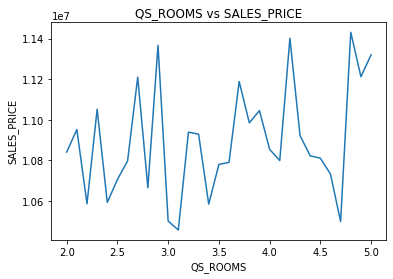

In [664]:
dfT.groupby('QS_ROOMS')['SALES_PRICE'].mean().plot()
plt.xlabel('QS_ROOMS')
plt.ylabel('SALES_PRICE')
plt.title('QS_ROOMS vs SALES_PRICE')
plt.show()

In [665]:
dfT[['QS_ROOMS','SALES_PRICE']].corr()

,QS_ROOMS,SALES_PRICE
QS_ROOMS,1.000000,0.021967
SALES_PRICE,0.021967,1.000000


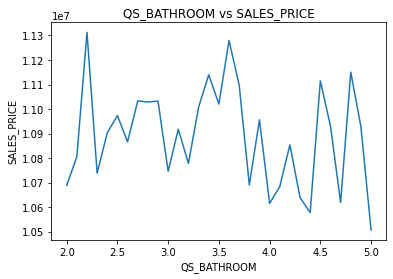

In [666]:
dfT.groupby('QS_BATHROOM')['SALES_PRICE'].mean().plot()
plt.xlabel('QS_BATHROOM')
plt.ylabel('SALES_PRICE')
plt.title('QS_BATHROOM vs SALES_PRICE')
plt.show()

In [667]:
dfT[['QS_BATHROOM','SALES_PRICE']].corr()

,QS_BATHROOM,SALES_PRICE
QS_BATHROOM,1.000000,-0.011377
SALES_PRICE,-0.011377,1.000000


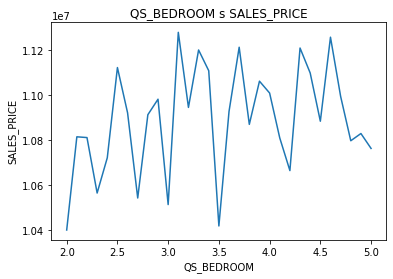

In [668]:
dfT.groupby('QS_BEDROOM')['SALES_PRICE'].mean().plot()
plt.xlabel('QS_BEDROOM')
plt.ylabel('SALES_PRICE')
plt.title('QS_BEDROOM s SALES_PRICE')
plt.show()

In [669]:
dfT[['QS_BEDROOM','SALES_PRICE']].corr()

,QS_BEDROOM,SALES_PRICE
QS_BEDROOM,1.000000,0.018804
SALES_PRICE,0.018804,1.000000


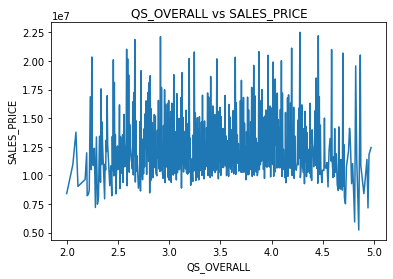

In [670]:
dfT.groupby('QS_OVERALL')['SALES_PRICE'].mean().plot()
plt.xlabel('QS_OVERALL')
plt.ylabel('SALES_PRICE')
plt.title('QS_OVERALL vs SALES_PRICE')
plt.show()

In [671]:
dfT[['QS_OVERALL','SALES_PRICE']].corr()

,QS_OVERALL,SALES_PRICE
QS_OVERALL,1.000000,0.020485
SALES_PRICE,0.020485,1.000000


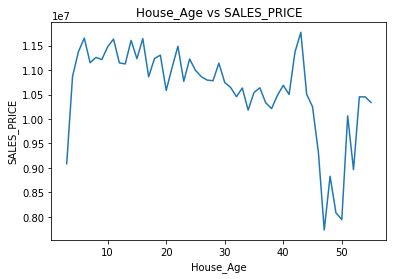

In [672]:
dfT.groupby('House_Age')['SALES_PRICE'].mean().plot()
plt.xlabel('House_Age')
plt.ylabel('SALES_PRICE')
plt.title('House_Age vs SALES_PRICE')
plt.show()

In [673]:
dfT[['House_Age','SALES_PRICE']].corr()

,House_Age,SALES_PRICE
House_Age,1.000000,-0.118842
SALES_PRICE,-0.118842,1.000000


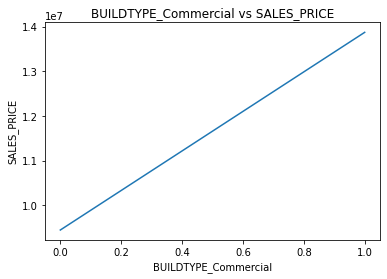

In [674]:
dfT.groupby('BUILDTYPE_Commercial')['SALES_PRICE'].mean().plot()
plt.xlabel('BUILDTYPE_Commercial')
plt.ylabel('SALES_PRICE')
plt.title('BUILDTYPE_Commercial vs SALES_PRICE')
plt.show()

In [675]:
dfT[['BUILDTYPE_Commercial','SALES_PRICE']].corr()

,BUILDTYPE_Commercial,SALES_PRICE
BUILDTYPE_Commercial,1.000000,0.551058
SALES_PRICE,0.551058,1.000000


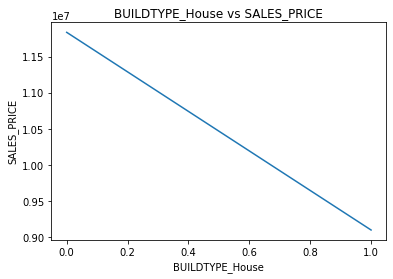

In [676]:
dfT.groupby('BUILDTYPE_House')['SALES_PRICE'].mean().plot()
plt.xlabel('BUILDTYPE_House')
plt.ylabel('SALES_PRICE')
plt.title('BUILDTYPE_House vs SALES_PRICE')
plt.show()

In [677]:
dfT[['BUILDTYPE_House','SALES_PRICE']].corr()

,BUILDTYPE_House,SALES_PRICE
BUILDTYPE_House,1.000000,-0.344982
SALES_PRICE,-0.344982,1.000000


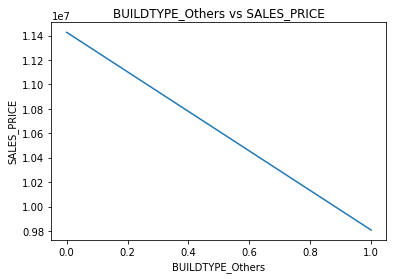

In [678]:
dfT.groupby('BUILDTYPE_Others')['SALES_PRICE'].mean().plot()
plt.xlabel('BUILDTYPE_Others')
plt.ylabel('SALES_PRICE')
plt.title('BUILDTYPE_Others vs SALES_PRICE')
plt.show()

In [679]:
dfT[['BUILDTYPE_Others','SALES_PRICE']].corr()

,BUILDTYPE_Others,SALES_PRICE
BUILDTYPE_Others,1.000000,-0.201783
SALES_PRICE,-0.201783,1.000000


In [680]:

#['DIST_MAINROAD','QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM','QS_OVERALL','House_Age'] these array of columns dont have linear relationship with SALES_PRICE. So dropping them from dataframe
# 'REG_FEE', 'COMMIS' are completely dependent on SALES_PRICE and are paid once property sold. So these two features dont contribute to Sales prediction and dropping from dataframe
dfT=dfT.drop(columns=['DIST_MAINROAD','QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM','QS_OVERALL','House_Age', 'REG_FEE', 'COMMIS'])


In [681]:
dfT.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,0,1004,1,1,3,2,1,3,1,0,7600000,1,0,0
1,5,1986,2,1,5,2,0,3,2,3,21717770,1,0,0
2,1,909,1,1,3,2,1,0,2,4,13159200,1,0,0
3,3,1855,3,2,5,1,0,2,1,2,9630290,0,0,1
4,0,1226,1,1,3,2,1,3,2,1,7406250,0,0,1


In [682]:
dfT=dfT.reindex(columns=['AREA','INT_SQFT','N_BEDROOM', 'N_BATHROOM','N_ROOM', 'SALE_COND', 'PARK_FACIL','UTILITY_AVAIL','STREET', 'MZZONE','BUILDTYPE_Commercial', 'BUILDTYPE_House', 'BUILDTYPE_Others','SALES_PRICE'])
#dfT=dfT.reindex(columns=['AREA','INT_SQFT','N_BEDROOM','N_ROOM', 'SALE_COND', 'PARK_FACIL','UTILITY_AVAIL','STREET', 'MZZONE','BUILDTYPE_Commercial', 'BUILDTYPE_House', 'BUILDTYPE_Others','SALES_PRICE'])
dfT.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others,SALES_PRICE
0,0,1004,1,1,3,2,1,3,1,0,1,0,0,7600000
1,5,1986,2,1,5,2,0,3,2,3,1,0,0,21717770
2,1,909,1,1,3,2,1,0,2,4,1,0,0,13159200
3,3,1855,3,2,5,1,0,2,1,2,0,0,1,9630290
4,0,1226,1,1,3,2,1,3,2,1,0,0,1,7406250


In [683]:
dfT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7109 entries, 0 to 7108
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   AREA                  7109 non-null   int64
 1   INT_SQFT              7109 non-null   int64
 2   N_BEDROOM             7109 non-null   int64
 3   N_BATHROOM            7109 non-null   int64
 4   N_ROOM                7109 non-null   int64
 5   SALE_COND             7109 non-null   int64
 6   PARK_FACIL            7109 non-null   int64
 7   UTILITY_AVAIL         7109 non-null   int64
 8   STREET                7109 non-null   int64
 9   MZZONE                7109 non-null   int64
 10  BUILDTYPE_Commercial  7109 non-null   uint8
 11  BUILDTYPE_House       7109 non-null   uint8
 12  BUILDTYPE_Others      7109 non-null   uint8
 13  SALES_PRICE           7109 non-null   int64
dtypes: int64(11), uint8(3)
memory usage: 687.3 KB


In [684]:
X=dfT[dfT.columns[:-1]].values
Y=dfT['SALES_PRICE'].values
#Extracting  features values to split the data into TRAIN and TEST

In [685]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25)
#Dateset has been split into two sets, train and test data train data with 75% and test data of 25%

In [686]:
#Scaling the data as many of the data are encoded to smaller values where as INT_SQFT is numerical larger number
#Scaling helps data to normalize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train,y_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test) 

In [687]:
#Modelling the data using LinearRegression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [688]:
#Predict the values using test data
y_predLR = regressor.predict(X_test_scaled)

In [689]:
#Check evaluation metric for the model
from sklearn import metrics 
print('R2- SCORE for linear Regression:', metrics.r2_score(y_test,y_predLR))

R2- SCORE for linear Regression: 0.9196177407172214


In [690]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
for i in [1,2,3,4,5,6,7,8,9,10,20,50,100]:
  knn = KNeighborsRegressor(n_neighbors=i) #initialising the model
  knn.fit(X_train_scaled, y_train) # training the model
  print("K value  : " , i, " score : ", np.mean(cross_val_score(knn, X_train_scaled, y_train, cv=10))) #predicting using the model


K value  :  1  score :  0.9303758309219619
K value  :  2  score :  0.9465211773072643
K value  :  3  score :  0.9505992122124983
K value  :  4  score :  0.951914540262662
K value  :  5  score :  0.9526849277326457
K value  :  6  score :  0.9534903787658283
K value  :  7  score :  0.9527238567229729
K value  :  8  score :  0.951888521016811
K value  :  9  score :  0.9509308728655009
K value  :  10  score :  0.9500387437245283
K value  :  20  score :  0.9394302558668913
K value  :  50  score :  0.9126648984144801
K value  :  100  score :  0.8891591613596079


In [691]:
#With K=6 ,we have  better cross value score of 0.954

In [692]:
knn = KNeighborsRegressor(n_neighbors=6)
knn.fit(X_train_scaled, y_train)
y_predknn = knn.predict(X_test_scaled)
print('R2- SCORE for KNN:', metrics.r2_score(y_test,y_predknn))

R2- SCORE for KNN: 0.9538193538887425


In [693]:
#R2 score for KNN algorithm is 0.95 , Better than Linear Regression

In [694]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)
print('R2- SCORE for Decision Tree algorithm:', metrics.r2_score(y_test,y_pred_dt))

R2- SCORE for Decision Tree algorithm: 0.9733732499933166


In [695]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators= 100, max_depth = 11, max_features='sqrt')
#rf = RandomForestRegressor(n_estimators= 100, max_depth=3, max_features='sqrt')
rf.fit(X_train_scaled, y_train);
y_pred_rf = rf.predict(X_test_scaled)
print('R2- SCORE for Random Forest algorithm with max_depth of 11:', metrics.r2_score(y_test,y_pred_rf))

R2- SCORE for Random Forest algorithm with max_depth of 11: 0.9835487408842135


In [696]:

rf3 = RandomForestRegressor(n_estimators= 100, max_depth=3, max_features='sqrt')
rf3.fit(X_train_scaled, y_train);
y_pred_rf = rf3.predict(X_test_scaled)
print('R2- SCORE for Random Forest algorithm with max_depth of 3:', metrics.r2_score(y_test,y_pred_rf))

R2- SCORE for Random Forest algorithm with max_depth of 3: 0.7874996532585808


In [697]:
##To avoid overfitting of model features are trimed to log(11)/log(2)

In [698]:
original_feature_list=list(dfT[dfT.columns[:-1]].columns)
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(original_feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


Variable: AREA                 Importance: 0.25
Variable: BUILDTYPE_Commercial Importance: 0.23
Variable: INT_SQFT             Importance: 0.15
Variable: N_ROOM               Importance: 0.11
Variable: MZZONE               Importance: 0.07
Variable: BUILDTYPE_House      Importance: 0.06
Variable: N_BEDROOM            Importance: 0.04
Variable: BUILDTYPE_Others     Importance: 0.04
Variable: PARK_FACIL           Importance: 0.02
Variable: N_BATHROOM           Importance: 0.01
Variable: SALE_COND            Importance: 0.01
Variable: STREET               Importance: 0.01
Variable: UTILITY_AVAIL        Importance: 0.0


In [699]:
#As per the Random Forset feature importence, Above are the important features, only utility_available is least importance, beang Area,Build_type,SQFT are more important features

In [700]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(X_train_scaled, y_train) #train the model
  model.score(X_train_scaled, y_train) # scoring the model - r2 squared
  print("Learning rate : ", lr, " Train score : ", model.score(X_train_scaled, y_train), " Cross-Val score : ", np.mean(cross_val_score(model, X_train_scaled, y_train, cv=10)))

Learning rate :  0.01  Train score :  -0.38473287342091966  Cross-Val score :  -0.39058597509804727
Learning rate :  0.02  Train score :  0.7456084710639793  Cross-Val score :  0.7424374832277755
Learning rate :  0.03  Train score :  0.9244425716989996  Cross-Val score :  0.9218692018899814
Learning rate :  0.04  Train score :  0.9618492968496206  Cross-Val score :  0.9594778621084179
Learning rate :  0.05  Train score :  0.9736356704723629  Cross-Val score :  0.971681268698655
Learning rate :  0.06  Train score :  0.9789537439223919  Cross-Val score :  0.9776289059355048
Learning rate :  0.07  Train score :  0.9840152128858102  Cross-Val score :  0.9820480861396177
Learning rate :  0.08  Train score :  0.9870285918173852  Cross-Val score :  0.9850419968144257
Learning rate :  0.09  Train score :  0.9888896204688288  Cross-Val score :  0.9870714425065075
Learning rate :  0.1  Train score :  0.9904652576836253  Cross-Val score :  0.9887977669486139
Learning rate :  0.11  Train score :  

In [701]:
#For Learning rate of 0.7, we have better cross validation score.
model = xgb.XGBRegressor(learning_rate = 0.7, n_estimators=100)
model.fit(X_train_scaled, y_train) #train the model
y_pred_xgb = model.predict(X_test_scaled)
print('R2- SCORE for XG Boost:', metrics.r2_score(y_test,y_pred_xgb))


[12:17:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2- SCORE for XG Boost: 0.9933684383068533


# **Conclusion**
Considering all regression models and their R2 score for trained data and test data, We found out XG Boost is well fitted and provide 99% accuracy 